# 1 3 5 - Jack
# 2 4 - Jayden
Explain why we chose a given algorithm not how the algorithm works

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import read_classification_dataset, features_histograms_mean_std
# import sklearn
from sklearnex import patch_sklearn
from sklearn.calibration import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer

In [36]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [37]:
train, target, test = read_classification_dataset(1)
X, y = train.values, target.values.flatten()

In [38]:
test.isna().sum().sum()

7021

In [39]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311
0,3.824254,1.923762,1.918450,2.352067,3.117298,3.051735,3.307977,3.430222,3.586667,3.605218,...,1.836830,1.855640,1.142389,2.054345,2.808224,1.782186,2.665703,2.468214,2.478581,2.308842
1,3.904190,2.309524,2.152930,NaN,3.532368,3.524866,3.677791,3.636671,3.696868,3.716764,...,1.951532,1.442323,1.000000,2.127914,2.979658,1.961089,2.519027,2.054383,2.689903,2.090928
2,3.750908,1.161068,1.017033,2.347993,3.381889,3.393096,3.509134,3.512466,3.622203,3.603050,...,1.000000,1.584105,1.000000,1.945321,3.257004,1.965061,2.536066,1.449324,2.605230,1.368659
3,3.809383,1.912355,1.856940,2.498944,3.289406,3.371232,3.541995,NaN,3.473179,3.628930,...,1.869965,1.481658,1.000000,2.155032,3.270371,1.928473,2.618074,2.154013,2.530046,2.185514
4,3.893561,2.094192,1.881271,2.785707,3.344339,3.274417,3.485872,3.516527,3.642358,3.688235,...,1.480725,1.510545,1.000000,2.094192,3.246666,1.824516,2.562317,1.942256,2.598517,1.764624


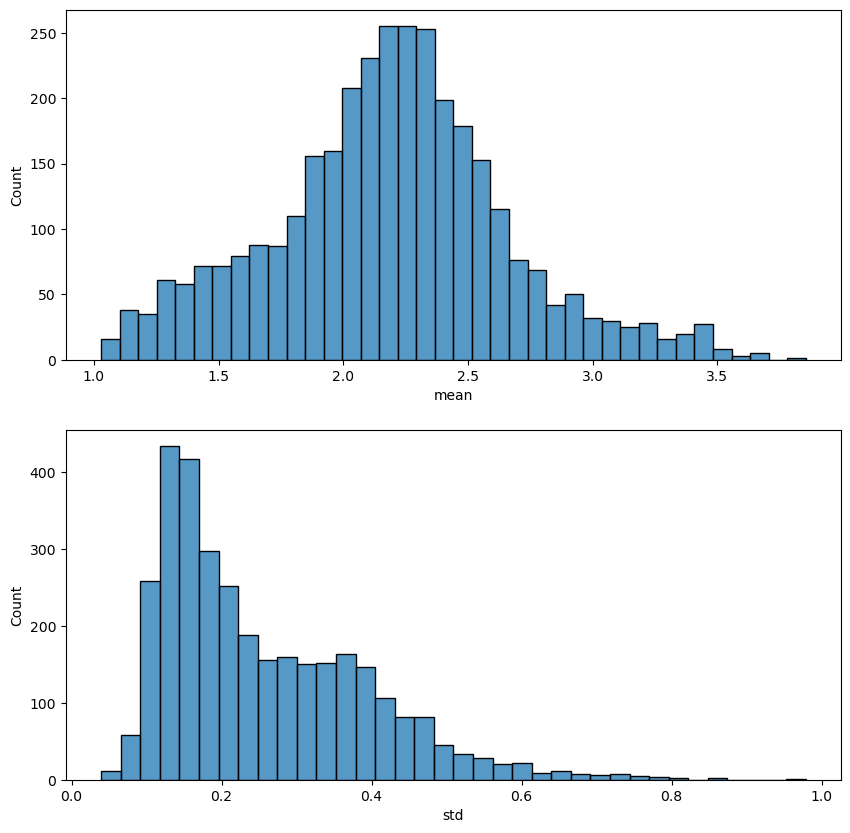

In [40]:
features_histograms_mean_std(train)

In [41]:
print("Missing value count:",  train.isna().sum().sum())
print("Number of categories:",(len(target[0].unique())))

Missing value count: 9936
Number of categories: 5


In [42]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import scale
# from sklearn.decomposition import PCA
# train_test_split

# n=150
# # do PCA dim reduction to 5
# pca = PCA(n_components=n)
# pca_evr = pca.fit(scale(train))

# pca_evr = (pca.explained_variance_ratio_)



# pca_evr = np.concatenate((np.zeros(1), pca_evr))
# plt.plot(list(range(n+1)),np.cumsum(pca_evr), color = 'black')
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title("PCA - Cumulative Explained Variance Ratio")
# plt.grid()
# print(np.cumsum(pca_evr))

In [49]:
# raise KeyError
clf = Pipeline([
  ('imputation', KNNImputer(n_neighbors=3, weights='distance')),
  ('classification', RandomForestClassifier())
])
# clf.fit(train.values, target.values.flatten())
# Test Random Forest
scores = cross_val_score(clf, X, y, scoring='f1_weighted',  cv=5)
scores


c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([0.82222222, 0.9637037 , 0.847343  , 0.85333333, 0.9503876 ])

In [44]:
# clf = LassoCV().fit(X, y)
# importance = np.abs(clf.coef_)
# idx_third = importance.argsort()[-3]
# threshold = importance[idx_third] + 0.01

# idx_features = (-importance).argsort()[:2]
# # name_features = np.array(feature_names)[idx_features]
# print('Selected features: {}'.format(idx_features))

# sfm = SelectFromModel(clf, threshold=threshold)
# sfm.fit(X, y)
# X_transform = sfm.transform(X)

# n_features = sfm.transform(X).shape[1]

In [48]:

# knn = KNeighborsClassifier(7, p=3000, weights='distance',n_jobs = -1)
# knn.fit( MinMaxScaler(feature_range=(0, 1)).fit_transform(train.values), target.values)
knn = Pipeline(
    [
        ('Imputer', KNNImputer(n_neighbors=3, weights='distance')),
        ('Scaler', MinMaxScaler(feature_range=(0, 1))),
        ('KNN', KNeighborsClassifier(5, weights='distance',)),
    ]
)

# score = cross_val_score(knn, MinMaxScaler(feature_range=(0, 1)).fit_transform(X), y, cv=3)
score = cross_val_score(knn, X, y,scoring='f1_weighted', cv=5)
score

c:\ProgramData\miniconda3\envs\dsci\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


array([1.        , 0.96866002, 0.847343  , 0.91262626, 0.9503876 ])